# Experiment 2 - On-Surface Functionality

In [9]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import shapiro

# 01. Load the Data

In [10]:
# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Adjust ROOT to your repository directory
ROOT = '..'

# Set the experiment ids
PATH_40_RAFT = 'datasets/evaluation/offline/on_surface/4cm/experiment_1681817246'

PATH_80_RAFT = 'datasets/evaluation/offline/on_surface/8cm/experiment_1681892890'

PATH_120_RAFT = 'datasets/evaluation/offline/on_surface/12cm/experiment_1681892056'

PATH_WAVE_RAFT = 'datasets/evaluation/offline/on_surface/wave/experiment_1682179525'

PATH_CURVE_RAFT = 'datasets/evaluation/offline/on_surface/curve/experiment_1682180763'

PATH_TRIANGLE_RAFT = 'datasets/evaluation/offline/on_surface/triangle/experiment_1682180421'

# Read the measurement results
df_40_raft_results = pd.read_csv(os.path.join(ROOT, PATH_40_RAFT, 'results.csv'))

df_80_raft_results = pd.read_csv(os.path.join(ROOT, PATH_80_RAFT, 'results.csv'))

df_120_raft_results = pd.read_csv(os.path.join(ROOT, PATH_120_RAFT, 'results.csv'))

df_wave_raft_results = pd.read_csv(os.path.join(ROOT, PATH_WAVE_RAFT, 'results.csv'))

df_curve_raft_results = pd.read_csv(os.path.join(ROOT, PATH_CURVE_RAFT, 'results.csv'))

df_triangle_raft_results = pd.read_csv(os.path.join(ROOT, PATH_TRIANGLE_RAFT, 'results.csv'))

# Create a dictionary of the results
dataframes = {'df_40_raft_results': df_40_raft_results,
              'df_80_raft_results': df_80_raft_results,
              'df_120_raft_results': df_120_raft_results,
              'df_wave_raft_results': df_wave_raft_results,
              'df_curve_raft_results': df_curve_raft_results,
              'df_triangle_raft_results': df_triangle_raft_results
              }

# Initialize the metric dictionaries for each subplot
metrics_dict_on_surface = {}
metrics_dict_spline = {}

df_metrics_dict_on_surface = pd.DataFrame()
df_metrics_dict_spline = pd.DataFrame()

# Method that returns the metrics for a given numpy array
def get_metrics(measurements):
    
    metrics = {'mae': float(measurements.mean()),
                      'min': float(measurements.min()),
                      'std': float(measurements.std()),
                      'p25': float(np.percentile(measurements, 25)),
                      'p50': float(np.percentile(measurements, 50)),
                      'p75': float(np.percentile(measurements, 75)),
                      'p95': float(np.percentile(measurements, 95)),
                      'p975': float(np.percentile(measurements, 97.5)),
                      'max': float(measurements.max())}
    
    return metrics

# Store all metrics in the specific dictionary
for key in dataframes:
    # Calculate absolute difference
    dataframes[key]['euclidian_diff'] = (dataframes[key]['euclidian'] - dataframes[key]['ground_truth']).abs()

    # Calculate absolute difference
    dataframes[key]['on_surface_diff'] = (dataframes[key]['on_surface'] - dataframes[key]['ground_truth']).abs()

    # Calculate absolute difference
    dataframes[key]['on_surface_spline_diff'] = (dataframes[key]['on_surface_spline'] - dataframes[key]['ground_truth']).abs()
    
    ae_on_surface = dataframes[key]['on_surface_diff'].to_numpy()
    
    ae_spline = dataframes[key]['on_surface_spline_diff'].to_numpy()
    
    metrics_on_surface = get_metrics(ae_on_surface)
    
    metrics_spline = get_metrics(ae_spline)
    
    metrics_dict_on_surface[key] = metrics_on_surface
                
    metrics_dict_spline[key] = metrics_spline
    
    # df_metrics_dict_on_surface = df_metrics_dict_on_surface.append(pd.Series(metrics_on_surface, name=key))
    # Do the same with concatenation instead
    # df_metrics_dict_on_surface = pd.concat([df_metrics_dict_on_surface, pd.Series(metrics_on_surface, name=key)], axis=1)
    
    #df_metrics_dict_spline = df_metrics_dict_spline.append(pd.Series(metrics_spline, name=key))
    # Do the same with concatenation instead
    # df_metrics_dict_spline = pd.concat([df_metrics_dict_spline, pd.Series(metrics_spline, name=key)], axis=1)

    df_metrics_dict_on_surface = pd.concat([df_metrics_dict_on_surface, pd.Series(metrics_on_surface, name=key).to_frame().T], axis=0)
    df_metrics_dict_spline = pd.concat([df_metrics_dict_spline, pd.Series(metrics_spline, name=key).to_frame().T], axis=0)

print('On Surface')
df_metrics_dict_on_surface = df_metrics_dict_on_surface[['mae', 'std', 'min', 'p25', 'p50', 'p75', 'p95', 'p975', 'max']]
print(df_metrics_dict_on_surface.round(2).to_latex())
print('Spline')
df_metrics_dict_spline = df_metrics_dict_spline[['mae', 'std', 'min', 'p25', 'p50', 'p75', 'p95', 'p975', 'max']]
print(df_metrics_dict_spline.round(2).to_latex())



On Surface
\begin{tabular}{lrrrrrrrrr}
\toprule
 & mae & std & min & p25 & p50 & p75 & p95 & p975 & max \\
\midrule
df_40_raft_results & 0.830000 & 0.980000 & 0.010000 & 0.170000 & 0.470000 & 1.030000 & 2.850000 & 3.390000 & 4.260000 \\
df_80_raft_results & 1.500000 & 1.830000 & 0.050000 & 0.280000 & 0.740000 & 1.520000 & 5.560000 & 6.040000 & 8.050000 \\
df_120_raft_results & 2.050000 & 2.490000 & 0.090000 & 0.520000 & 1.050000 & 1.850000 & 7.430000 & 9.030000 & 9.600000 \\
df_wave_raft_results & 2.680000 & 1.780000 & 0.190000 & 1.290000 & 2.420000 & 4.210000 & 4.970000 & 6.250000 & 7.210000 \\
df_curve_raft_results & 1.710000 & 1.200000 & 0.100000 & 0.900000 & 1.310000 & 2.630000 & 3.960000 & 4.270000 & 4.400000 \\
df_triangle_raft_results & 1.350000 & 1.340000 & 0.060000 & 0.370000 & 0.580000 & 2.750000 & 3.640000 & 3.670000 & 3.780000 \\
\bottomrule
\end{tabular}

Spline
\begin{tabular}{lrrrrrrrrr}
\toprule
 & mae & std & min & p25 & p50 & p75 & p95 & p975 & max \\
\midrule
df_40_r

# 02. Metrics

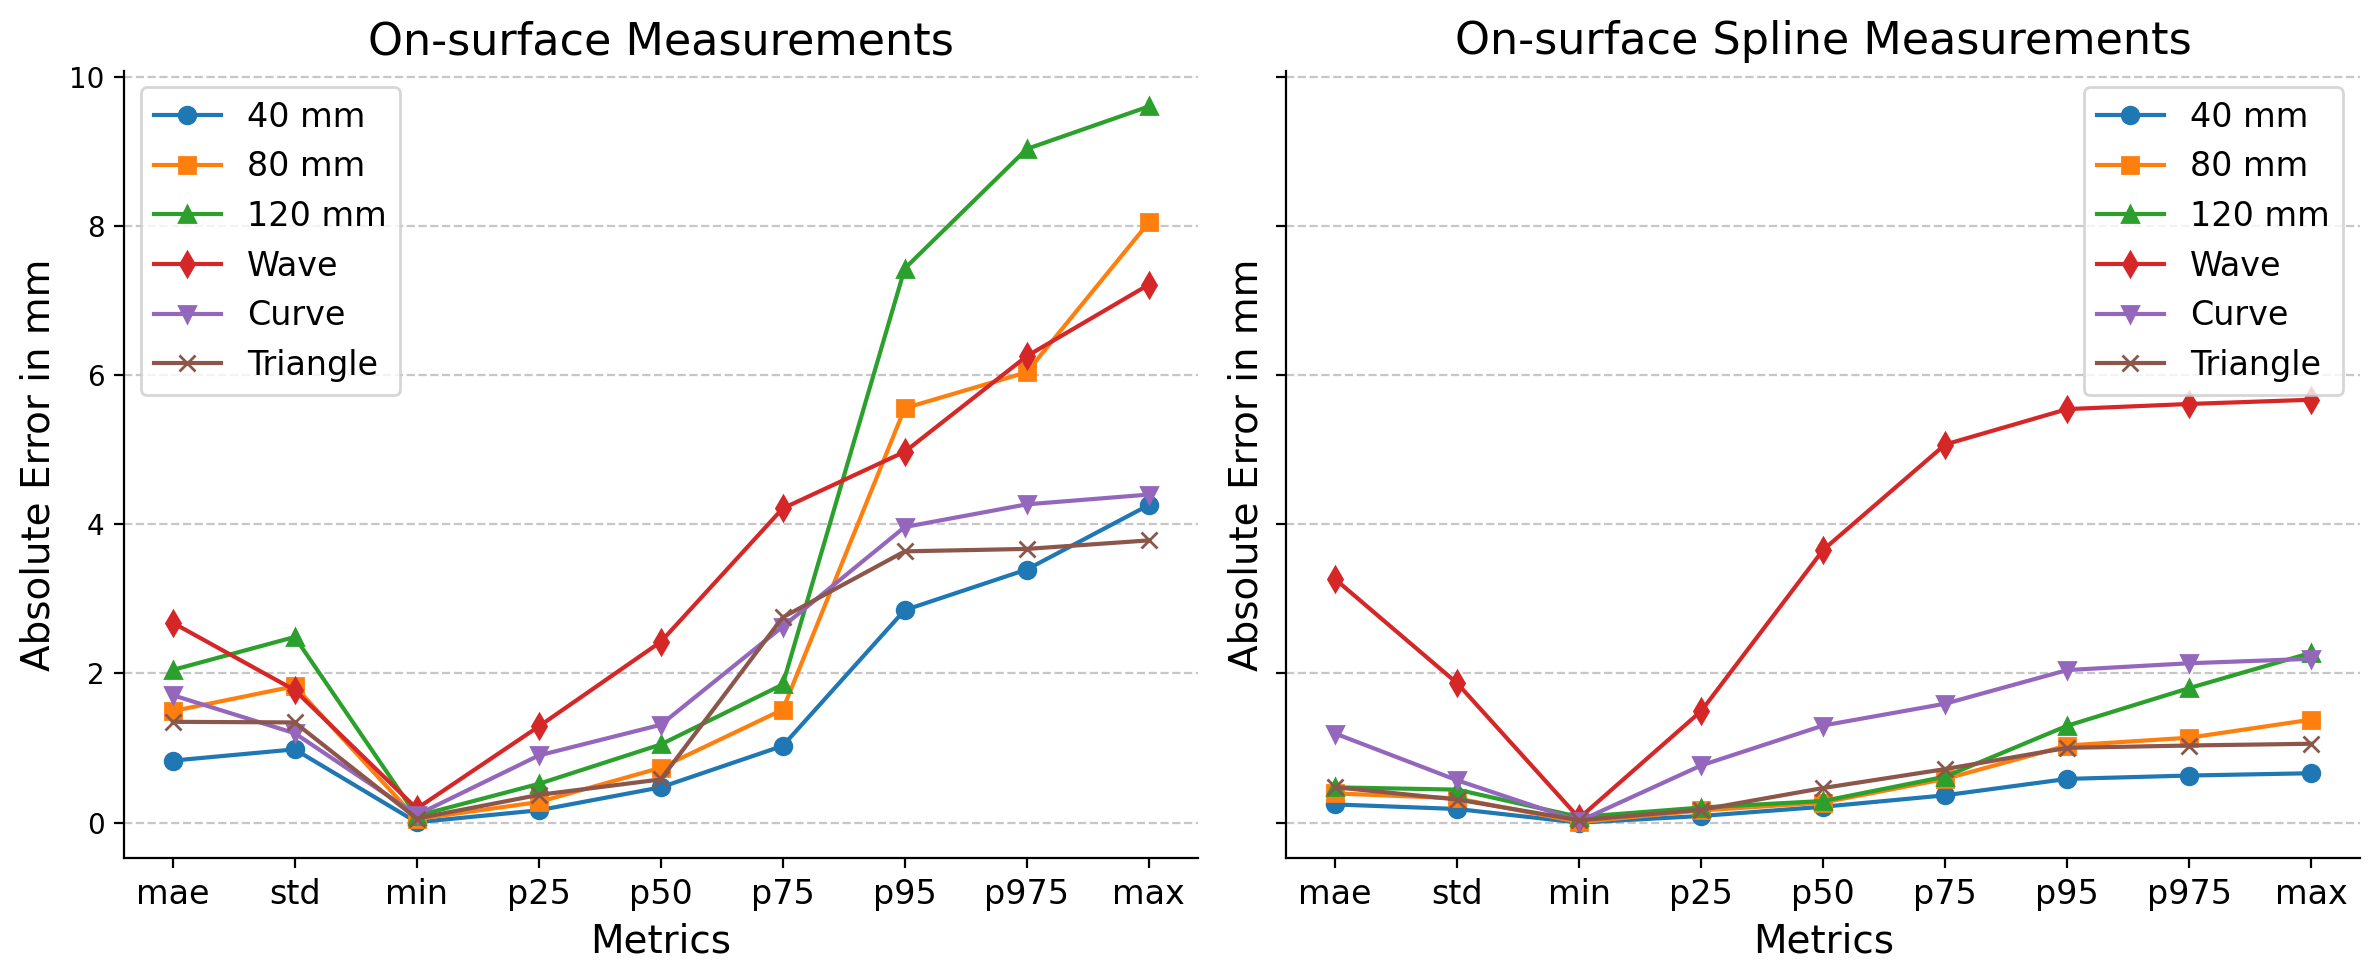

In [11]:
# Choose the measurements to be considered
metrics = [metrics_dict_on_surface['df_40_raft_results'], metrics_dict_on_surface['df_80_raft_results'], metrics_dict_on_surface['df_120_raft_results'], metrics_dict_on_surface['df_wave_raft_results'], metrics_dict_on_surface['df_curve_raft_results'], metrics_dict_on_surface['df_triangle_raft_results']]
metrics2 = [metrics_dict_spline['df_40_raft_results'], metrics_dict_spline['df_80_raft_results'], metrics_dict_spline['df_120_raft_results'], metrics_dict_spline['df_wave_raft_results'], metrics_dict_spline['df_curve_raft_results'], metrics_dict_spline['df_triangle_raft_results']]

{'df_40_raft_results': df_40_raft_results,
              'df_80_raft_results': df_80_raft_results,
              'df_120_raft_results': df_120_raft_results,
              'df_wave_raft_results': df_wave_raft_results,
              'df_curve_raft_results': df_curve_raft_results,
              'df_triangle_raft_results': df_triangle_raft_results
              }

labels = ['40 mm', '80 mm', '120 mm', 'Wave', 'Curve', 'Triangle']
keys = ['mae', 'std', 'min', 'p25', 'p50', 'p75', 'p95', 'p975', 'max']

# Extract values of interest
values = [[m[key] for key in keys] for m in metrics]
values2 = [[m[key] for key in keys] for m in metrics2]

# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=200, sharey=True)

# Function to plot line plots for each subplot
def plot_metrics(ax, values, labels, title):
    x = np.arange(len(keys))
    markers = ['o', 's', '^', 'd', 'v', 'x']
    for i, val in enumerate(values):
        ax.plot(x, val, marker=markers[i], label=labels[i])

    ax.set_xticks(x)
    ax.set_xticklabels(keys, fontsize=12)
    ax.set_xlabel('Metrics', fontsize=14)
    ax.set_ylabel('Absolute Error in mm', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Plot the data as line plots
plot_metrics(axs[0], values, labels, 'On-surface Measurements')
plot_metrics(axs[1], values2, labels, 'On-surface Spline Measurements')

# Show the plot
plt.tight_layout()
plt.show()

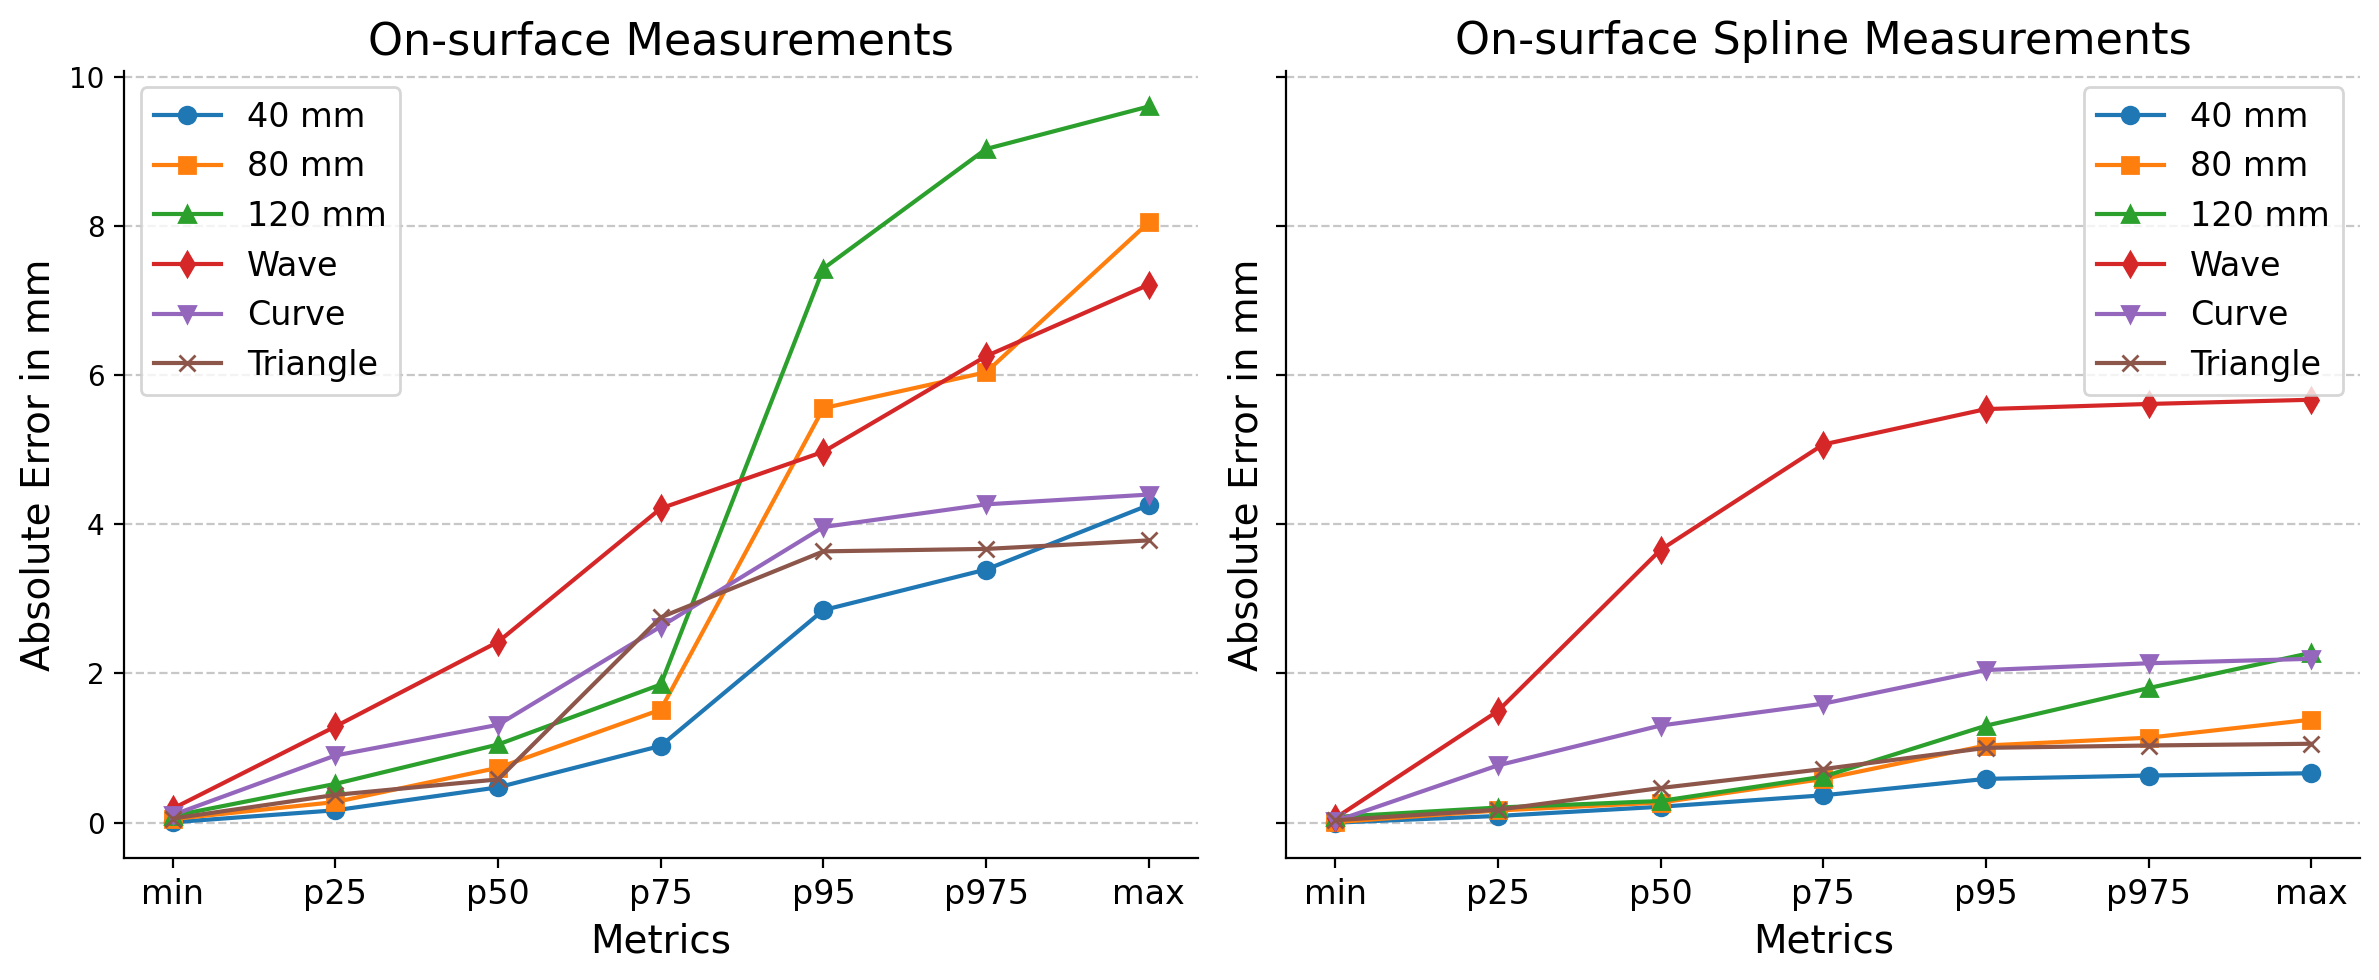

In [12]:
# Choose the measurements to be considered
metrics = [metrics_dict_on_surface['df_40_raft_results'], metrics_dict_on_surface['df_80_raft_results'], metrics_dict_on_surface['df_120_raft_results'], metrics_dict_on_surface['df_wave_raft_results'], metrics_dict_on_surface['df_curve_raft_results'], metrics_dict_on_surface['df_triangle_raft_results']]
metrics2 = [metrics_dict_spline['df_40_raft_results'], metrics_dict_spline['df_80_raft_results'], metrics_dict_spline['df_120_raft_results'], metrics_dict_spline['df_wave_raft_results'], metrics_dict_spline['df_curve_raft_results'], metrics_dict_spline['df_triangle_raft_results']]

{'df_40_raft_results': df_40_raft_results,
              'df_80_raft_results': df_80_raft_results,
              'df_120_raft_results': df_120_raft_results,
              'df_wave_raft_results': df_wave_raft_results,
              'df_curve_raft_results': df_curve_raft_results,
              'df_triangle_raft_results': df_triangle_raft_results
              }

labels = ['40 mm', '80 mm', '120 mm', 'Wave', 'Curve', 'Triangle']
keys = ['min', 'p25', 'p50', 'p75', 'p95', 'p975', 'max']

# Extract values of interest
values = [[m[key] for key in keys] for m in metrics]
values2 = [[m[key] for key in keys] for m in metrics2]

# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=200, sharey=True)

# Function to plot line plots for each subplot
def plot_metrics(ax, values, labels, title):
    x = np.arange(len(keys))
    markers = ['o', 's', '^', 'd', 'v', 'x']
    for i, val in enumerate(values):
        ax.plot(x, val, marker=markers[i], label=labels[i])

    ax.set_xticks(x)
    ax.set_xticklabels(keys, fontsize=12)
    ax.set_xlabel('Metrics', fontsize=14)
    ax.set_ylabel('Absolute Error in mm', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Plot the data as line plots
plot_metrics(axs[0], values, labels, 'On-surface Measurements')
plot_metrics(axs[1], values2, labels, 'On-surface Spline Measurements')

# Show the plot
plt.tight_layout()
plt.show()

# 03. Boxplots

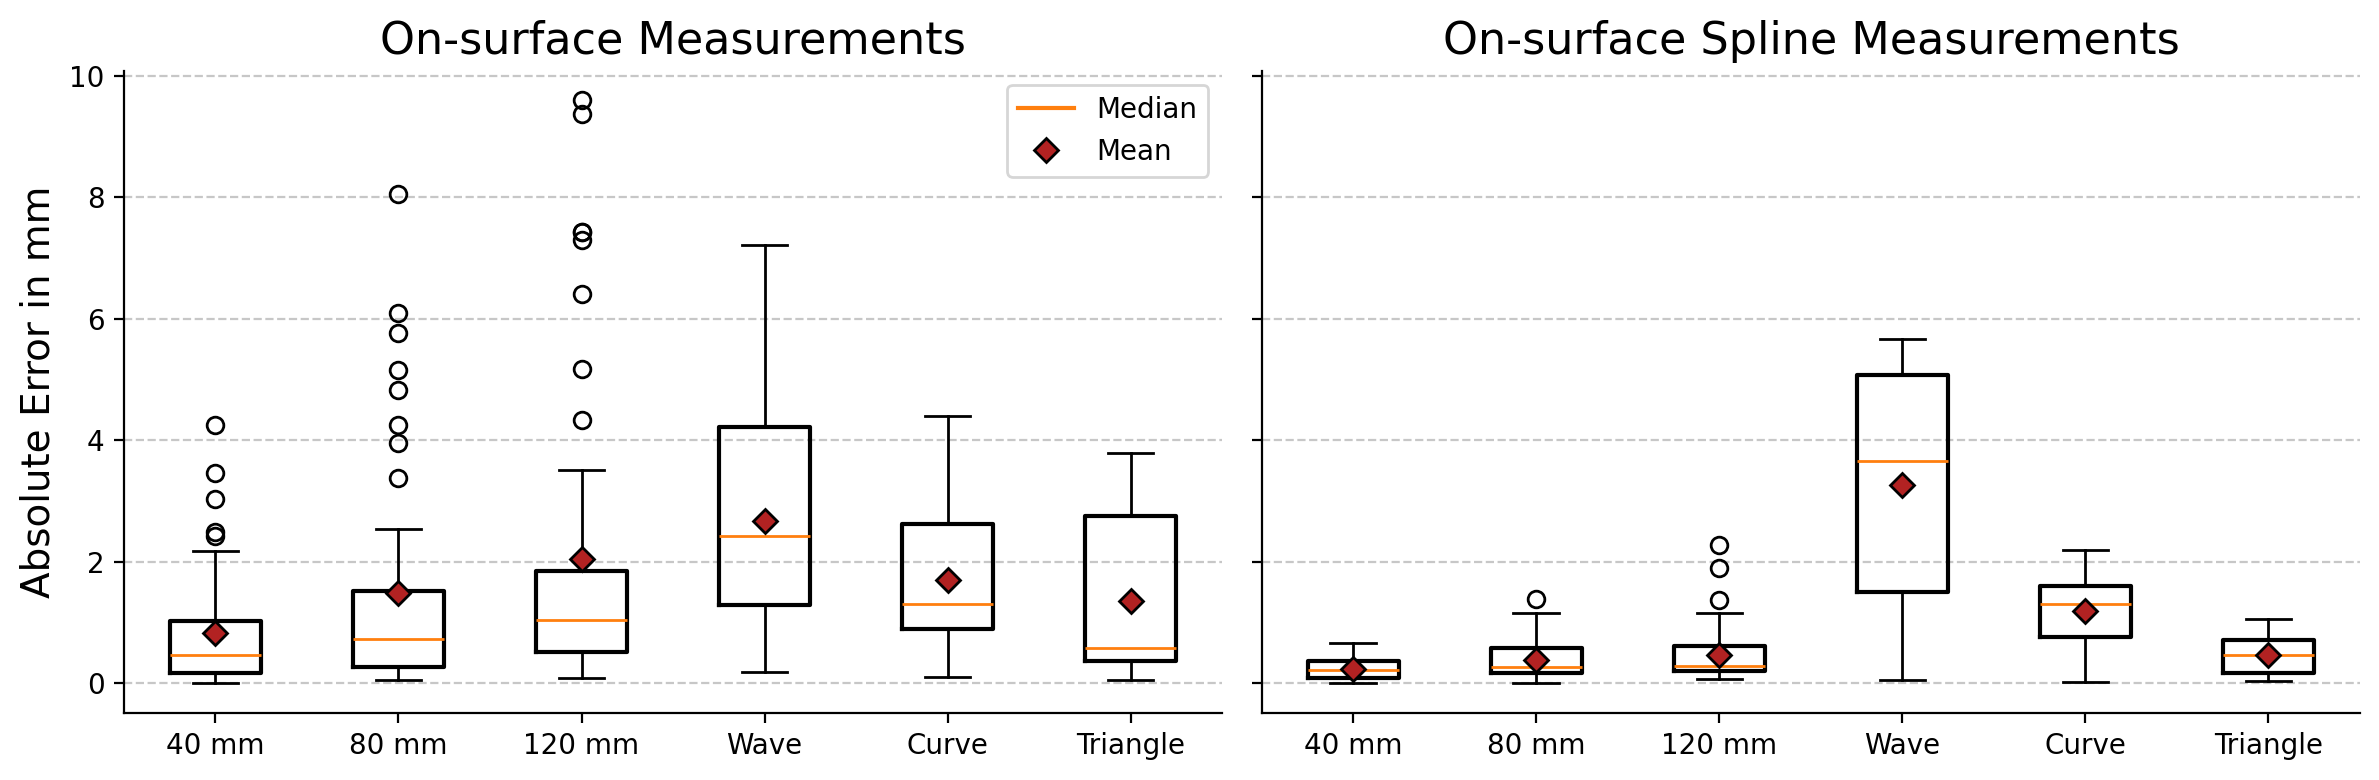

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

maes = [
    dataframes['df_40_raft_results']['on_surface_diff'].to_numpy(),
    dataframes['df_80_raft_results']['on_surface_diff'].to_numpy(),
    dataframes['df_120_raft_results']['on_surface_diff'].to_numpy(),
    dataframes['df_wave_raft_results']['on_surface_diff'].to_numpy(),
    dataframes['df_curve_raft_results']['on_surface_diff'].to_numpy(),
    dataframes['df_triangle_raft_results']['on_surface_diff'].to_numpy()
]

maes2 = [
    dataframes['df_40_raft_results']['on_surface_spline_diff'].to_numpy(),
    dataframes['df_80_raft_results']['on_surface_spline_diff'].to_numpy(),
    dataframes['df_120_raft_results']['on_surface_spline_diff'].to_numpy(),
    dataframes['df_wave_raft_results']['on_surface_spline_diff'].to_numpy(),
    dataframes['df_curve_raft_results']['on_surface_spline_diff'].to_numpy(),
    dataframes['df_triangle_raft_results']['on_surface_spline_diff'].to_numpy()
]

labels = ['40 mm', '80 mm', '120 mm', 'Wave', 'Curve', 'Triangle']

# Set up the plot with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, dpi=200, figsize=(12, 4), sharey=True)

# Boxplot properties
boxprops = dict(linestyle='-', linewidth=1.5)
meanprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick', markersize=6)

# Create the first boxplot
ax1.boxplot(maes, labels=labels, boxprops=boxprops, meanprops=meanprops, showmeans=True, meanline=False)
ax1.set_title('On-surface Measurements', fontsize=16)
ax1.set_ylabel('Absolute Error in mm', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create the second boxplot
ax2.boxplot(maes2, labels=labels, boxprops=boxprops, meanprops=meanprops, showmeans=True, meanline=False)
ax2.set_title('On-surface Spline Measurements', fontsize=16)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines for both subplots
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Create custom legend elements
legend_elements = [
    Line2D([0], [0], color='C1', lw=1.5, label='Median'),
    Line2D([0], [0], marker='D', color='w', markeredgecolor='k', markerfacecolor='firebrick', markersize=6, label='Mean')
]

# Add the legend
ax1.legend(handles=legend_elements, loc='upper right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()